# Loading data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Import
data = pd.read_csv('dataset_mood_smartphone.csv')

#Convert time column to date time format
data['time']= pd.to_datetime(data['time']) 

# Changing to multi index with time and ID

In [2]:
data = data.set_index(['id', 'time'])

We want to reformat the data such that we have a number of observations for each patient, with each observation consisting of some time period e.g one week. Each observation will have a measurement for each attribute (e.g., Avg time spent on weather app over period) with the dependent variable as the average mood over the period. 

In [3]:
#reshaping the dataframe so that each column is a feature, indexed first by patient then time
data2 = pd.pivot_table(data, index=['id', 'time'], columns='variable', values='value')

data2.head()

variable                         activity  appCat.builtin  \
id      time                                                
AS14.01 2014-02-17 12:04:42.394       NaN             NaN   
        2014-02-17 18:28:25.520       NaN             NaN   
        2014-02-18 09:29:51.257       NaN             NaN   
        2014-02-19 14:43:30.575       NaN             NaN   
        2014-02-19 17:29:10.378       NaN             NaN   

variable                         appCat.communication  appCat.entertainment  \
id      time                                                                  
AS14.01 2014-02-17 12:04:42.394                   NaN                   NaN   
        2014-02-17 18:28:25.520                   NaN                   NaN   
        2014-02-18 09:29:51.257                   NaN                   NaN   
        2014-02-19 14:43:30.575                   NaN                   NaN   
        2014-02-19 17:29:10.378                   NaN                   NaN   

variable                         appCat.finance  appCat.game  appCat.office  \
id      time                                                                  
AS14.01 2014-02-17 12:04:42.394             NaN          NaN            NaN   
        2014-02-17 18:28:25.520             NaN          NaN            NaN   
        2014-02-18 09:29:51.257             NaN          NaN            NaN   
        2014-02-19 14:43:30.575             NaN          NaN            NaN   
        2014-02-19 17:29:10.378             NaN          NaN            NaN   

variable                         appCat.other  appCat.social  appCat.travel  \
id      time                                                                  
AS14.01 2014-02-17 12:04:42.394           NaN            NaN            NaN   
        2014-02-17 18:28:25.520           NaN            NaN            NaN   
        2014-02-18 09:29:51.257           NaN            NaN            NaN   
        2014-02-19 14:43:30.575           NaN            NaN            NaN   
        2014-02-19 17:29:10.378           NaN            NaN            NaN   

variable                         appCat.unknown  appCat.utilities  \
id      time                                                        
AS14.01 2014-02-17 12:04:42.394             NaN               NaN   
        2014-02-17 18:28:25.520             NaN               NaN   
        2014-02-18 09:29:51.257             NaN               NaN   
        2014-02-19 14:43:30.575             NaN               NaN   
        2014-02-19 17:29:10.378             NaN               NaN   

variable                         appCat.weather  call  circumplex.arousal  \
id      time                                                                
AS14.01 2014-02-17 12:04:42.394             NaN   1.0                 NaN   
        2014-02-17 18:28:25.520             NaN   1.0                 NaN   
        2014-02-18 09:29:51.257             NaN   1.0                 NaN   
        2014-02-19 14:43:30.575             NaN   1.0                 NaN   
        2014-02-19 17:29:10.378             NaN   1.0                 NaN   

variable                         circumplex.valence  mood  screen  sms  
id      time                                                            
AS14.01 2014-02-17 12:04:42.394                 NaN   NaN     NaN  NaN  
        2014-02-17 18:28:25.520                 NaN   NaN     NaN  NaN  
        2014-02-18 09:29:51.257                 NaN   NaN     NaN  NaN  
        2014-02-19 14:43:30.575                 NaN   NaN     NaN  NaN  
        2014-02-19 17:29:10.378                 NaN   NaN     NaN  NaN

# Exploration

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015FBA2D9400>]],
      dtype=object)

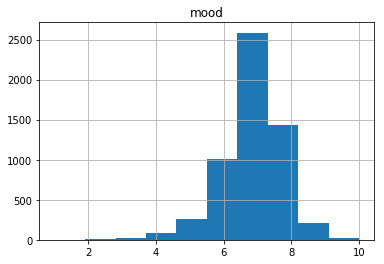

In [4]:
#We can now look at the distributions for each variable
data2.hist('mood')

In [5]:
#Number of available instances for each variable, for each patient
data2.groupby(level=0).count()

variable,activity,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,call,circumplex.arousal,circumplex.valence,mood,screen,sms
id,,,,,,,,,,,,,,,,,,,
AS14.01,1056,6299,5337,609,275,12,23,327,1097,135,14,518,1,151,216,209,221,5438,39
AS14.02,687,4075,2449,418,0,0,0,213,561,303,0,28,0,451,157,157,157,4838,81
AS14.03,1122,903,2848,3387,72,0,102,494,18,51,46,31,3,223,221,221,221,4401,59
AS14.05,1169,1031,3800,3319,0,0,1,469,358,1,207,144,0,103,238,237,241,4380,40
AS14.06,772,558,3300,7171,0,15,74,255,1220,131,2,0,12,133,201,200,202,3738,102
AS14.07,952,3753,5050,258,0,1,0,260,482,81,65,9,0,116,191,191,192,4343,99
AS14.08,1159,633,1689,78,0,0,6,388,1058,26,25,58,0,10,298,297,299,1770,105
AS14.09,659,368,1783,4380,46,2,24,148,103,180,42,60,17,134,193,195,197,2311,38
AS14.12,932,7233,1188,604,99,18,74,201,1528,402,9,48,3,159,182,174,183,4220,38


There are a number of attributes for which we have few or no measurements for many of the patients, namely: Finance, Games, office, unknown, and weather. In some of these cases they may be entirely useless, especially if they happen to be highly correlated with other variables. We could consider taking binary indicators for some of these, with the intuition that if they check finance or office apps they have assets or a job, if they check the weather app they go outside, if they play mobile games they procrastinate etc

# Aggregating the data into time windows 

For all of the apps, sms and calls we take the sum over the windows, since they are either times spent or number of calls etc. For arousal, mood and valence we take the mean.

In [9]:
#This is currently grouping observations into 2 day windows, can make a decision on this later
data2 = data2.groupby([pd.Grouper(freq='2D', level='time'), 
                             pd.Grouper(level='id')]).agg({'activity': 'sum', 'appCat.builtin':'sum',
                                                           'appCat.communication':'sum', 'appCat.entertainment':'sum',
                                                           'appCat.finance':'sum', 'appCat.game':'sum', 'appCat.office':'sum',
                                                           'appCat.other':'sum', 'appCat.social':'sum', 'appCat.travel':'sum',
                                                           'appCat.unknown':'sum', 'appCat.utilities':'sum', 'appCat.weather':'sum',
                                                           'call':'sum', 'screen':'sum', 'sms':'sum','circumplex.valence':'mean',
                                                           'circumplex.arousal':'mean', 'mood':'mean'})

In [7]:
#This tells us the number of individuals for which we have mood data for each day in the dataset
data2.groupby(level=0)['mood'].count()

time
2014-02-17     0
2014-02-19     0
2014-02-21     0
2014-02-23     0
2014-02-25     1
2014-02-27     1
2014-03-01     0
2014-03-03     1
2014-03-05     2
2014-03-07     2
2014-03-09     2
2014-03-11     2
2014-03-13     6
2014-03-15     7
2014-03-17     6
2014-03-19    10
2014-03-21    16
2014-03-23    18
2014-03-25    18
2014-03-27    19
2014-03-29    19
2014-03-31    21
2014-04-02    24
2014-04-04    24
2014-04-06    24
2014-04-08    25
2014-04-10    25
2014-04-12    25
2014-04-14    26
2014-04-16    27
2014-04-18    27
2014-04-20    27
2014-04-22    27
2014-04-24    27
2014-04-26    26
2014-04-28    25
2014-04-30    26
2014-05-02    24
2014-05-04    25
2014-05-06    12
2014-05-08    11
2014-05-10     7
2014-05-12     7
2014-05-14     6
2014-05-16     3
2014-05-18     3
2014-05-20     3
2014-05-22     3
2014-05-24     3
2014-05-26     3
2014-05-28     3
2014-05-30     3
2014-06-01     1
2014-06-03     1
2014-06-05     1
2014-06-07     1
2014-06-09     0
Freq: 2D, Name: mood, dtyp

It is clear that there is a narrow time period over which we have data for all patients simulatneously. We cannot do much with days for which we little or no mood data, therefore we could consider discarding data in the early and late periods.

In [8]:
#This tells us the number of mood observations for each individual
data2.groupby(level=1)['mood'].count()

id
AS14.01    25
AS14.02    21
AS14.03    24
AS14.05    27
AS14.06    24
AS14.07    24
AS14.08    31
AS14.09    23
AS14.12    21
AS14.13    27
AS14.14    23
AS14.15    29
AS14.16    27
AS14.17    29
AS14.19    23
AS14.20    24
AS14.23    21
AS14.24    28
AS14.25    16
AS14.26    35
AS14.27    22
AS14.28    20
AS14.29    22
AS14.30    24
AS14.31    22
AS14.32    22
AS14.33    22
Name: mood, dtype: int64

We appear to have similar numbers of mood observations for each patient which is good

# Removing observations/days without mood measurements

In [ ]:
data2 = data2.dropna(subset=['mood'])
data2

# Dropping columns with little data

In [12]:
data2 = data2.drop(columns=['appCat.finance','appCat.game', 'appCat.unknown', 'appCat.weather'])

KeyError: "['appCat.finance' 'appCat.game' 'appCat.unknown' 'appCat.weather'] not found in axis"

# Pairwise plots

Looking at the number of non-zero observations in each column after the above transformations

C:\Users\corma\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\corma\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


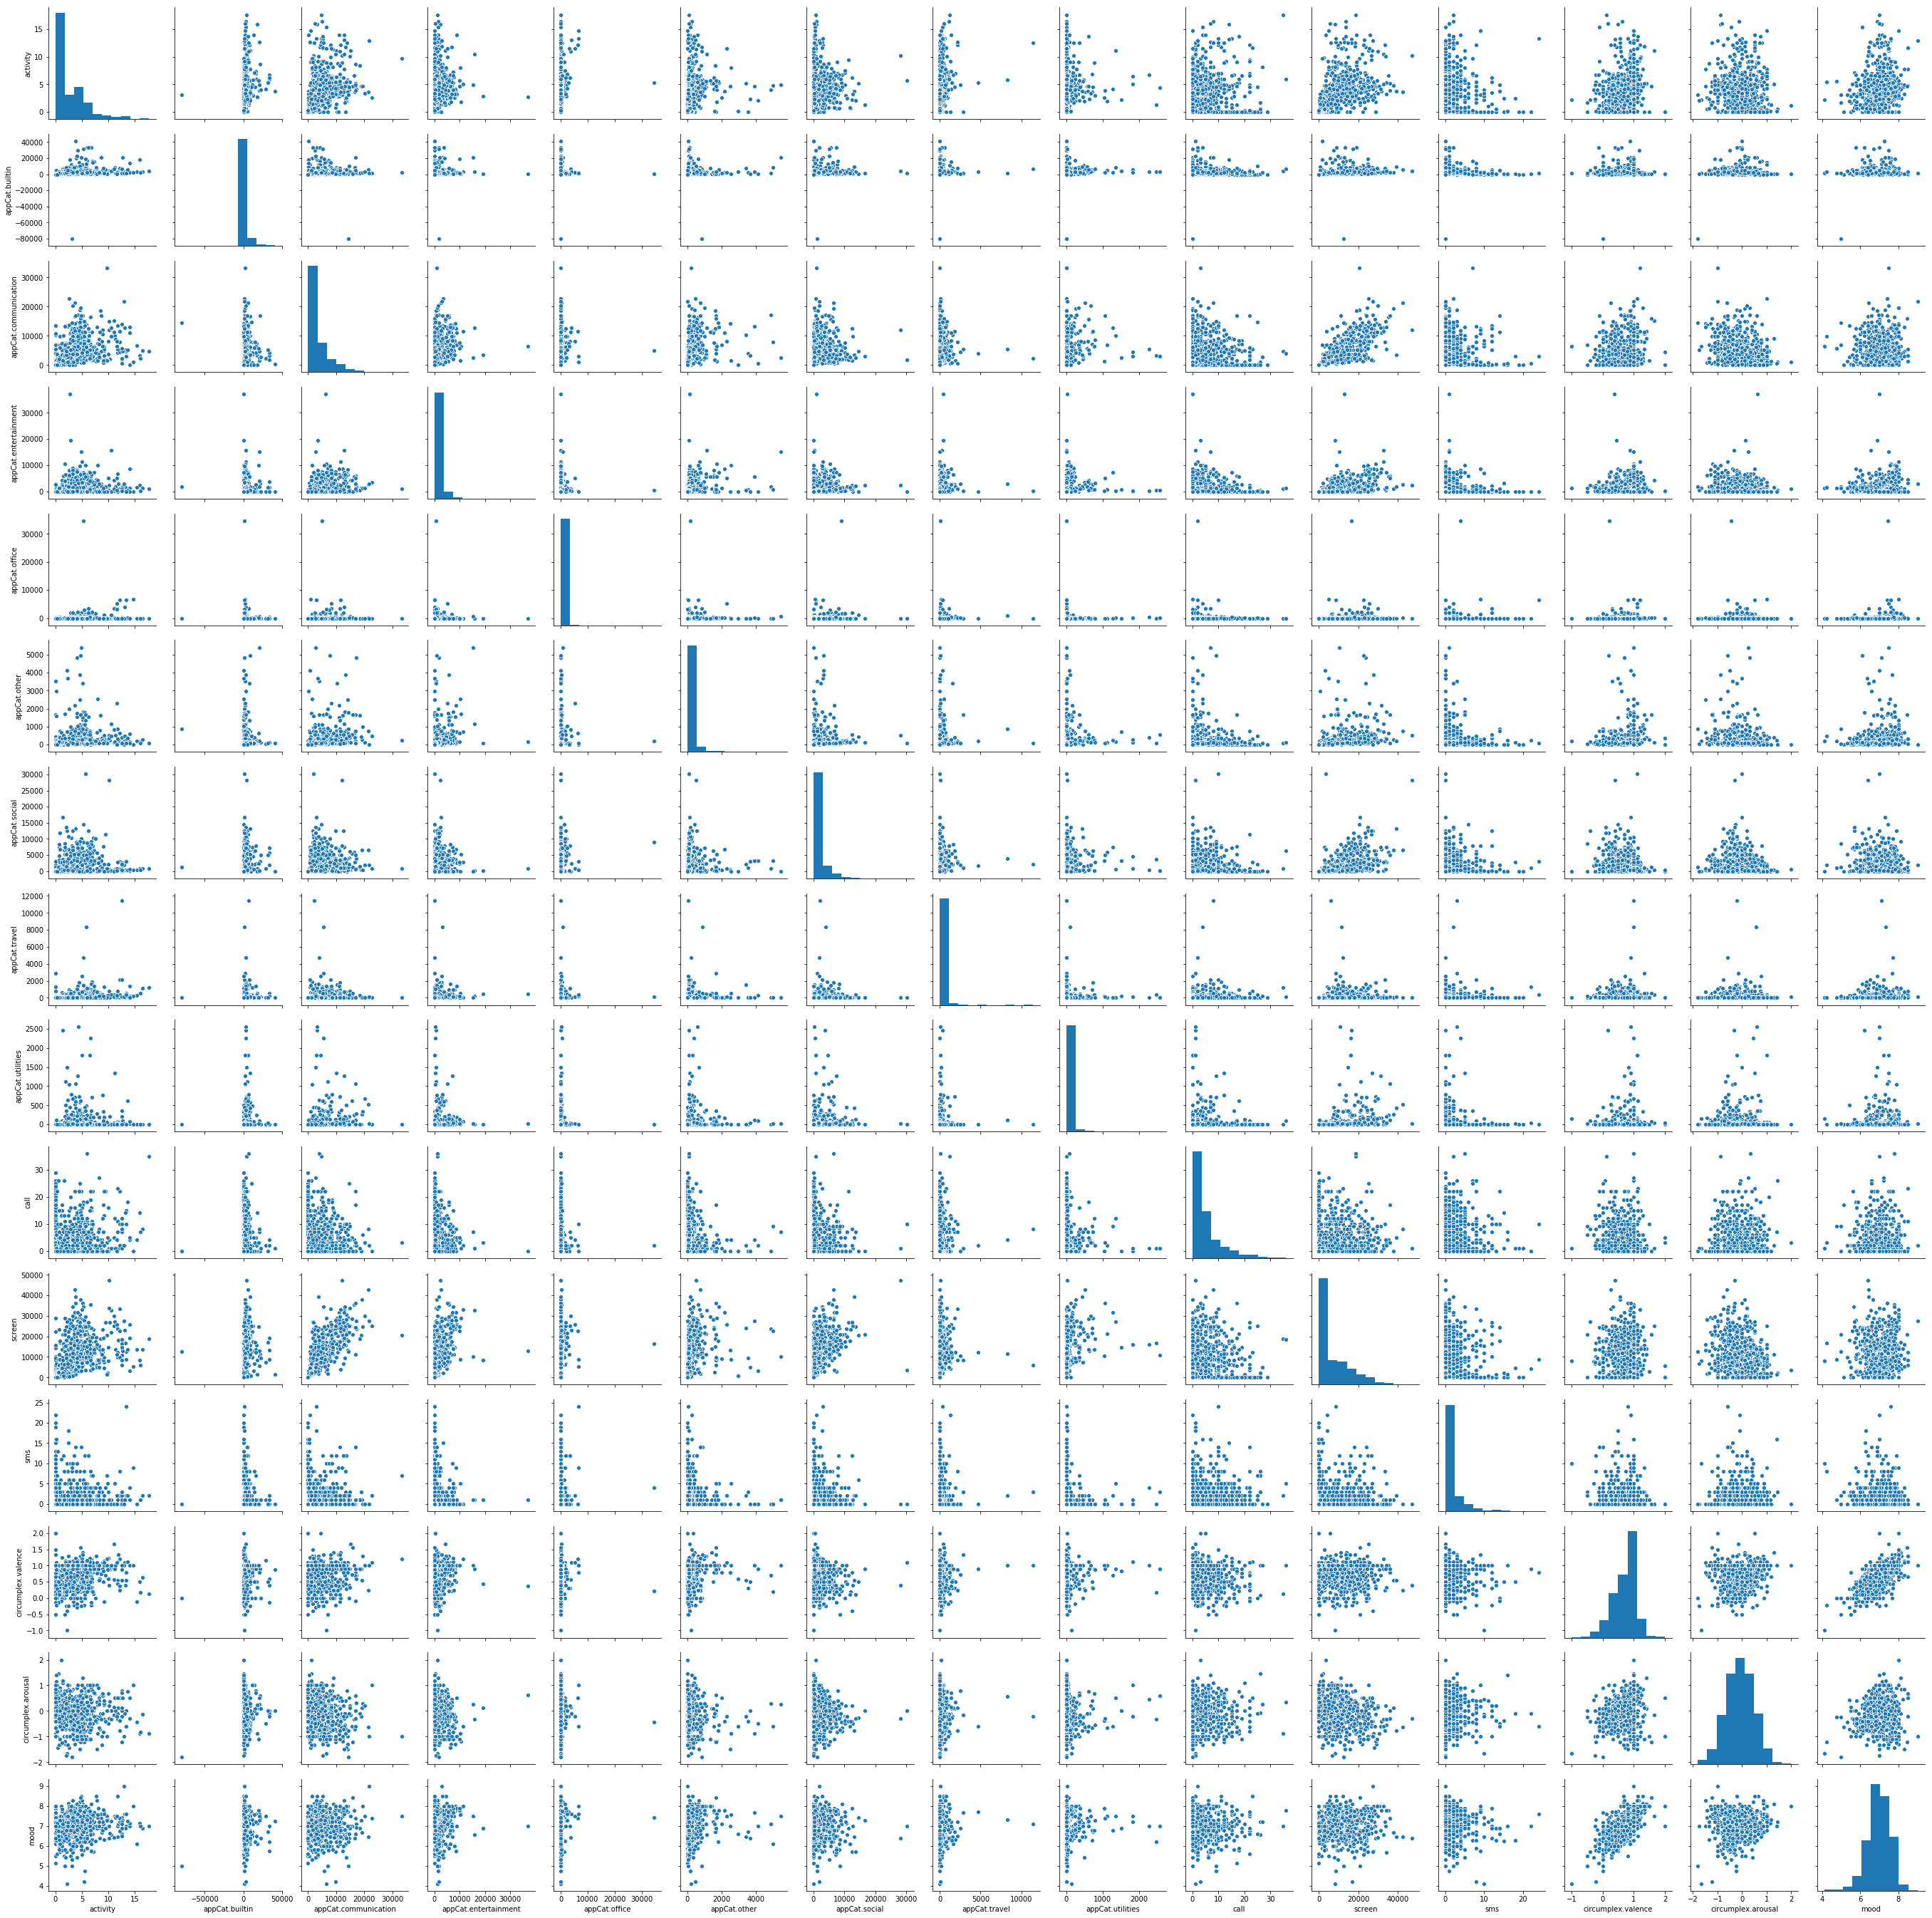

In [13]:
import seaborn as sns

sns.pairplot(data2.loc[:,data2.dtypes == 'float64'])

# Remove outliers

It is clear from the plots that there are some outliers that are nonsensical. No values should be negative apart from those for arousal or valence, which have a minimum value of -2. Therefore a good starting point is to remove any values which are less than that for the whole dataframe.

# Principle component Analysis

It's very probable that many of the apps serve similar purposes for the user and therefore may have a similar effect - a PCA could possibly decompose these features into a smaller subset representing e.g. A need for socializing (Messneger apps), boredom (News, finance)

In [ ]:
from sklearn.preprocessing import StandardScaler

#Before we can run PCA we need to standarize all of the features

features = ['activity', 'appCat.builtin', 'appCat.communication', 'appCat.entertainment', 'appCat.finance', 'appCat.game', 
            'appCat.office', 'appCat.other', 'appCat.social', 'appCat.travel', 'appCat.unknown', 'appCat.utilities', 
            'appCat.weather', 'call', 'screen', 'sms', 'circumplex.valence', 'circumplex.arousal']
x = data2.loc[:, features].values
x = StandardScaler().fit_transform(x)

y = data2.loc[:,['mood']].values

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])

principalDf.head()

In [ ]:
finalDf = pd.concat([principalDf, data2[['mood']]], axis = 1)